# Chapter 2: Multi-armed Bandits

This is the basic environment for the k-armed bandit problem as discussed in Sutton & Barto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments

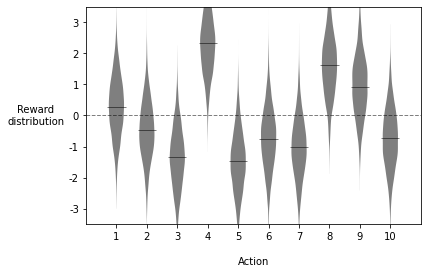

In [2]:
k=10
env = environments.KArmedBandit(k=k, seed=124)
fig, ax = plt.subplots()
env.plot_reward_dists(ax)

In [3]:
print(f"Most optimal action: {env.opt_action+1}")

Most optimal action: 4


In [4]:
k=10
env = environments.KArmedBandit(k=k, seed=124)
agent = agents.EpsilonGreedyAgent(k=k, epsilon=0.50)

agent.reset()
at, ro, gf = interface.run(agent=agent, environment=env, num_steps=1_000)

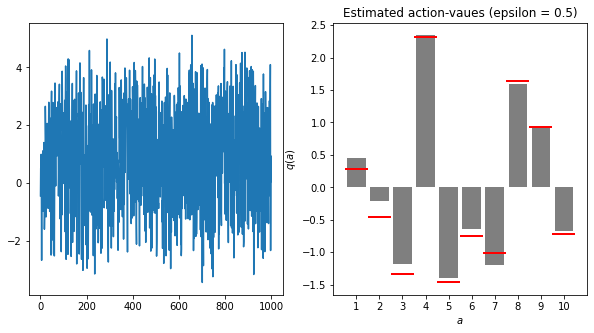

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].plot(ro)
interface.plot_results(agent, env, ax[1])

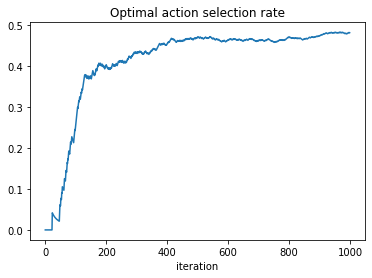

In [6]:
fig, ax = plt.subplots()
ax.plot(interface.cumavg(at == env.opt_action))
ax.set(title='Optimal action selection rate', xlabel='iteration')
plt.show()

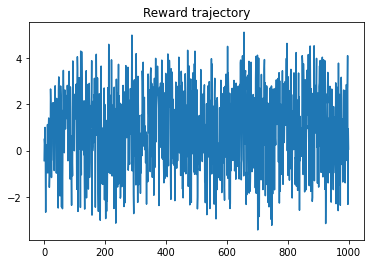

In [7]:
fig, ax = plt.subplots()
ax.plot(ro)
ax.set(title='Reward trajectory')
plt.show()

This makes sense to look so noisy because we never modify $\epsilon$; the agent eventually correctly identifies the optimal action, but it doesn't choose it any more frequently, since it keeps trying to explore. (If we modify the algorithm to shrink $\epsilon$ over time, this should taper off to the optimal mean reward.)

Instead of looking at a single agent's trajectories, we should run a bunch of agents and look at their average behavior. This will reduce the variability we see in a single agent's results.

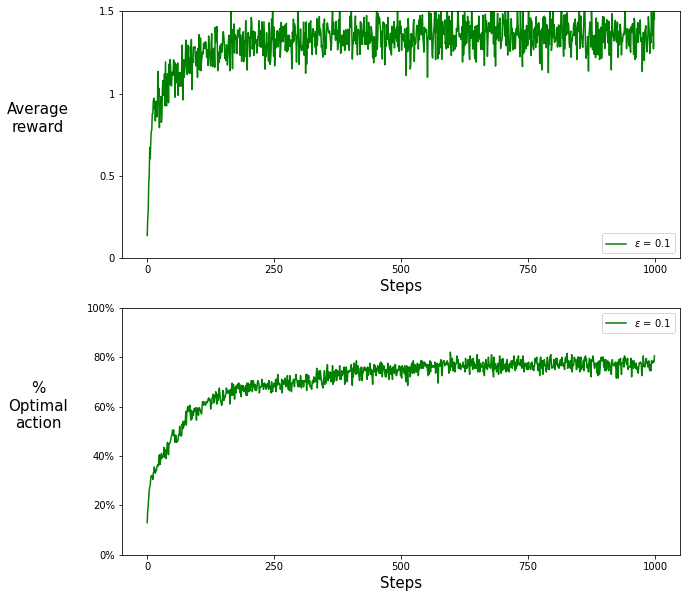

In [9]:
trajectories = interface.run_testbed(
    epsilons=[0.10],
    num_actions=10,
    num_runs_per_epsilon=200,
    num_steps_per_run=1_000,
)
interface.plot_trajectories_testbed(trajectories)

### Run for different values of $\epsilon$

Let's try different values of $\epsilon$ and use the same plots to compare their performance.

Remember that $\epsilon$ is the probability of making an exploratory action decision.

In [10]:
epsilons = [0.00, 0.01, 0.10]
num_actions = 10
num_runs_per_epsilon = 2_000
num_steps_per_run = 1_000

trajectories = interface.run_testbed(
    epsilons,
    num_actions,
    num_runs_per_epsilon,
    num_steps_per_run,
)

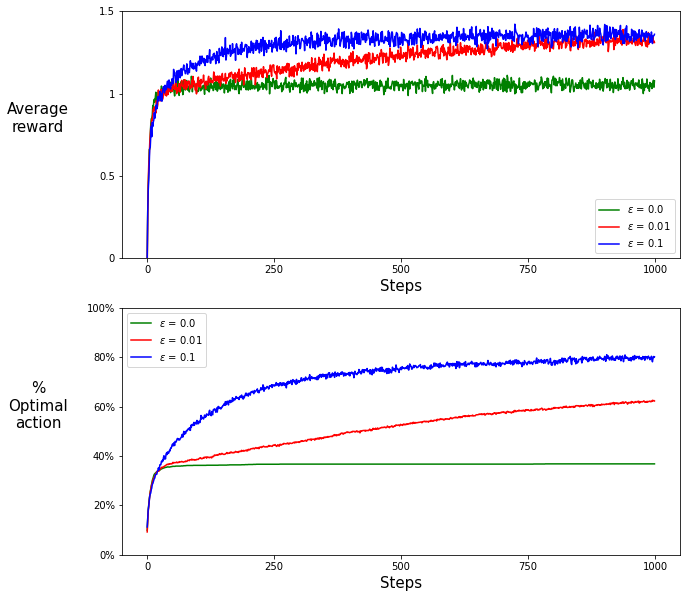

In [12]:
interface.plot_trajectories_testbed(trajectories)

**Key**: $\epsilon$ is the probability of exploration.

Thus, we expect agents using a smaller $\epsilon$ to take longer to find the optimal action, in general, but they should exploit it more in the long run.

## 2.6 Optimistic Initial Values

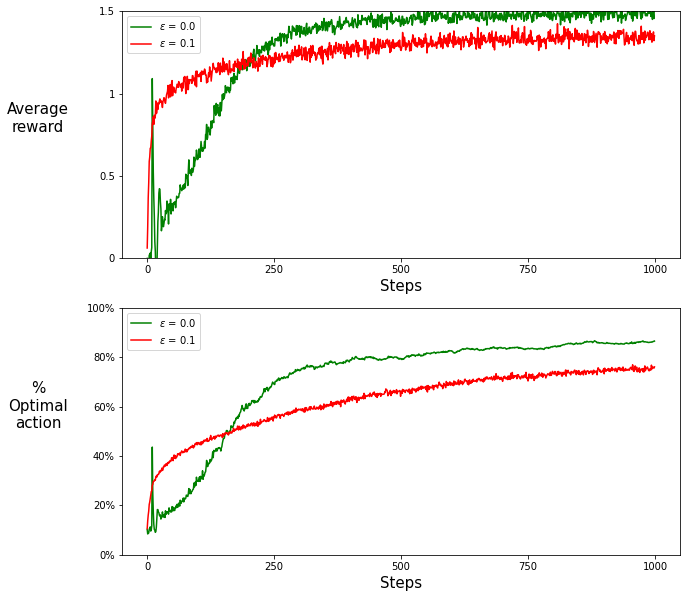

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments

epsilons = [0.00, 0.1]
q_inits = [5.0, 0.0]
alphas = [0.1, 0.1]

num_actions = 10
# num_runs_per_epsilon = 200
# num_steps_per_run = 100
num_runs_per_epsilon = 2_000
num_steps_per_run = 1_000

trajectories = interface.run_testbed(
    epsilons,
    num_actions,
    num_runs_per_epsilon,
    num_steps_per_run,
    q_inits=q_inits,
    update_step_sizes=alphas,
)
interface.plot_trajectories_testbed(trajectories)

Let's try with a non-stationary environment.

Starting simulation for epsilon = 0.1
  iter  100
  iter  200
  iter  300
  iter  400
  iter  500
  iter  600
  iter  700
  iter  800
  iter  900
  iter 1000
  iter 1100
  iter 1200
  iter 1300
  iter 1400
  iter 1500
  iter 1600
  iter 1700
  iter 1800
  iter 1900
  iter 2000
Starting simulation for epsilon = 0.1
  iter  100
  iter  200
  iter  300
  iter  400
  iter  500
  iter  600
  iter  700
  iter  800
  iter  900
  iter 1000
  iter 1100
  iter 1200
  iter 1300
  iter 1400
  iter 1500
  iter 1600
  iter 1700
  iter 1800
  iter 1900
  iter 2000


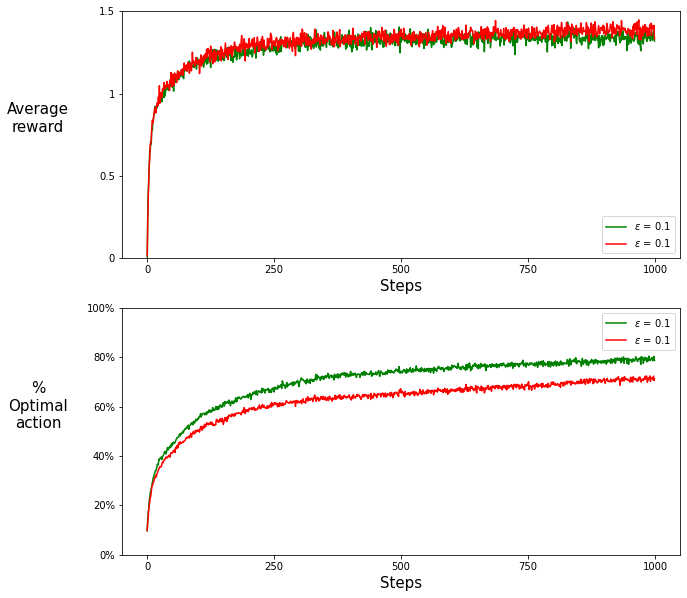

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments

epsilons = [0.1, 0.1]
stationaries = [True, False]

num_actions = 10
num_runs_per_epsilon = 200
num_steps_per_run = 100
num_runs_per_epsilon = 2_000
num_steps_per_run = 1_000

trajectories = interface.run_testbed(
    epsilons,
    num_actions,
    num_runs_per_epsilon,
    num_steps_per_run,
    stationaries=stationaries,
    verbose=True,
)
interface.plot_trajectories_testbed(trajectories)

## 2.8 Gradient Bandit Algorithms

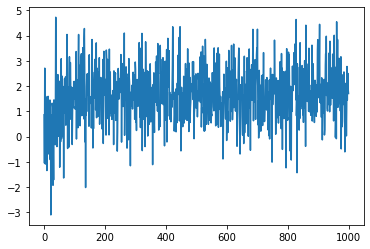

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments


num_actions = 10
alpha = 0.1
num_steps_per_run = 1_000

agent = agents.GradientBandit(
    k=num_actions,
    alpha=0.4,
)
env = environments.KArmedBandit(
    k=num_actions,
)
trajectory = interface.run(
    agent=agent,
    environment=env,
    num_steps=num_steps_per_run
)

plt.plot(trajectory[1])

In [8]:
env.opt_action

5

In [9]:
agent.h

array([-0.30646752, -0.68554423, -2.08496528, -1.29930884, -0.78060174,
        7.27324135, -0.28038191, -0.54683032,  0.05001343, -1.33915493])

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments

alphas = np.array([0.1, 0.4, 0.1, 0.4])
baselines = [0.0, 0.0, 4.0, 4.0]
num_actions = 10
# num_runs_per_alpha = 200
# num_steps_per_run = 100
num_runs_per_alpha = 2_000
num_steps_per_run = 1_000

trajectories = interface.run_testbed_gradient(
    alphas=alphas,
    num_actions=num_actions,
    num_runs_per_alpha=num_runs_per_alpha,
    num_steps_per_run=num_steps_per_run,
    baselines=baselines,
    )
interface.plot_trajectories_testbed(trajectories, param_name='alpha')

## 2.10 Summary

I want to replicate Figure 2.6 which displays a parameter study for four different types of bandit algorithms.

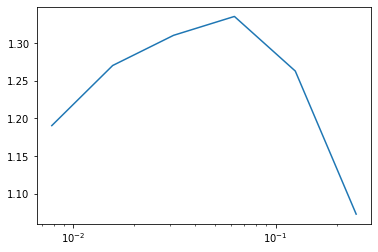

In [18]:

import matplotlib.pyplot as plt
import numpy as np

import interface
import agents
import environments

num_actions = 10
num_runs = 2_000

epsilons = np.array([1/128, 1/64, 1/32, 1/16, 1/8, 1/4])
avg_reward = np.zeros_like(epsilons)

for idx, eps in enumerate(epsilons):
    for _ in range(num_runs):
        agent = agents.EpsilonGreedyAgent(
            k=num_actions,
            epsilon=eps,
        )
        environment = environments.KArmedBandit(
            k=num_actions,
        )
        at, ro, gf = interface.run(
            agent=agent,
            environment=environment,
            num_steps=1_000,
        )
        avg_reward[idx] += ro.mean()

avg_reward = avg_reward / num_runs

In [28]:
avg_reward_trajectories = dict()
avg_reward_trajectories['epsilon-greedy'] = {
    'params': epsilons,
    'avg_reward': avg_reward,
}

In [32]:
# greedy with optimistic initialization
num_actions = 10
num_runs = 2_000


q_inits = np.array([1/4, 1/2, 1, 2, 4])
avg_reward = np.zeros_like(q_inits)
for idx, q_init in enumerate(q_inits):
    for _ in range(num_runs):
        agent = agents.EpsilonGreedyAgent(
            k=num_actions,
            epsilon=0,  # greedy
            q_init=q_init,
            update_step_size=0.1,
        )
        environment = environments.KArmedBandit(
            k=num_actions,
        )
        at, ro, gf = interface.run(
            agent=agent,
            environment=environment,
            num_steps=1_000,
        )
        avg_reward[idx] += ro.mean()

avg_reward = avg_reward / num_runs

In [47]:
avg_reward_trajectories['greedy-optimistic'] = {
    'params': q_inits,
    'avg_reward': avg_reward,
}

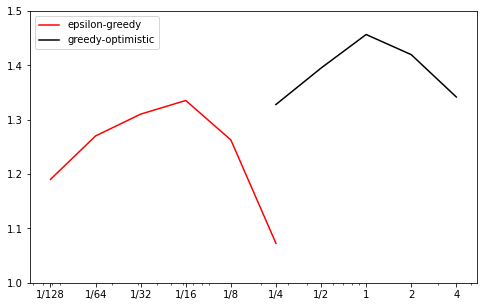

In [56]:
fig, ax = plt.subplots(figsize=(8,5))

alg_keys = ['epsilon-greedy', 'greedy-optimistic']
colors = ['red', 'black']

for alg_key, col in zip(alg_keys, colors):
    alg_results = avg_reward_trajectories[alg_key]
    ax.semilogx(alg_results['params'], alg_results['avg_reward'], label=alg_key, color=col)
    
xticks_ = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
xticklabels_ = ["1/128", "1/64", "1/32", "1/16", "1/8", "1/4", "1/2", "1", "2", "4"]
ax.set(xticks=xticks_, xticklabels=xticklabels_, ylim=[1, 1.5])
ax.legend()
plt.show()